In [1]:
import pandas as pd

In [5]:
import numpy as np # note this allows us to refer to numpy as np instead 

In [10]:
from sklearn import linear_model

# Load in house sales data

In [2]:

dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':float, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)
sales = sales.sort_values(by=['sqft_living','price'])

In [3]:
sales

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,3980300371,20140926T000000,142000.0,0.0,0.00,290.0,20875,1.0,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620.0,22850.0
15381,2856101479,20140701T000000,276000.0,1.0,0.75,370.0,1801,1.0,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340.0,5000.0
860,1723049033,20140620T000000,245000.0,1.0,0.75,380.0,15000,1.0,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170.0,15000.0
18379,1222029077,20141029T000000,265000.0,0.0,0.75,384.0,213444,1.0,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920.0,224341.0
4868,6896300380,20141002T000000,228000.0,0.0,1.00,390.0,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170.0,6000.0
21332,9266700190,20150511T000000,245000.0,1.0,1.00,390.0,2000,1.0,0,0,...,6,390,0,1920,0,98103,47.6938,-122.347,1340.0,5100.0
8623,6303400395,20150130T000000,325000.0,1.0,0.75,410.0,8636,1.0,0,0,...,4,410,0,1953,0,98146,47.5077,-122.357,1190.0,8636.0
11500,4322200105,20150331T000000,229050.0,1.0,1.00,420.0,3298,1.0,0,0,...,4,420,0,1949,0,98136,47.5375,-122.391,1460.0,4975.0
14466,7549801385,20140612T000000,280000.0,1.0,0.75,420.0,6720,1.0,0,0,...,5,420,0,1922,0,98108,47.5520,-122.311,1420.0,6720.0
465,8658300340,20140523T000000,80000.0,1.0,0.75,430.0,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200.0,7500.0


# Useful functions

Generate polynomial features

In [4]:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    poly_dataframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            poly_dataframe[name] = feature.apply(lambda x: x**power)
    return poly_dataframe

In [9]:
#testing
polynomial_dataframe(sales['sqft_living'],3)

,power_1,power_2,power_3
19452,290.0,84100.0,2.438900e+07
15381,370.0,136900.0,5.065300e+07
860,380.0,144400.0,5.487200e+07
18379,384.0,147456.0,5.662310e+07
4868,390.0,152100.0,5.931900e+07
21332,390.0,152100.0,5.931900e+07
8623,410.0,168100.0,6.892100e+07
11500,420.0,176400.0,7.408800e+07
14466,420.0,176400.0,7.408800e+07
465,430.0,184900.0,7.950700e+07


frames to numpy structures

In [ ]:
def get_numpy_data(data_sframe, features, output):
    data_sframe['constant'] = 1 # this is how you add a constant column to an SFrame
    # add the column 'constant' to the front of the features list so that we can extract it along with the others:
    features = ['constant'] + features # this is how you combine two lists
    # select the columns of data_SFrame given by the features list into the SFrame features_sframe (now including constant):
    features_sframe=data_sframe[features]
    # the following line will convert the features_SFrame into a numpy matrix:
    feature_matrix = features_sframe.to_numpy()
    # assign the column of data_sframe associated with the output to the SArray output_sarray
    output_sarray = data_sframe[output]
    # the following will convert the SArray into a numpy array by first converting it to a list
    output_array = output_sarray.to_numpy()
    return(feature_matrix, output_array)

# Plot functions

In [40]:
from matplotlib import pyplot as plt

In [37]:
def plot_data(data,Y):    
    plt.plot(data['power_1'],Y,'k.')
    plt.xlabel('x')
    plt.ylabel('y')

In [29]:
#test - creating data frame from python dic
pd.DataFrame({'x':[1,2,3],'y':[11,22,33]})

,x,y
0,1,11
1,2,22
2,3,33


In [58]:
def plot_poly_predictions(data, Y, model):
    plot_data(data, Y)

    # Get the degree of the polynomial
    deg = len(model.coef_)
    
    # Create 200 points in the x axis and compute the predicted value for each point
    x_pred = pd.DataFrame({'X1':[i for i in range(14000)]})
    y_pred = model.predict(polynomial_dataframe(x_pred,deg))
    
    #print(x_pred['X1'])
    #print(y_pred)
    
    # plot predictions
    plt.plot(x_pred['X1'], y_pred, 'g-', label='degree ' + str(deg) + ' fit')
    plt.legend(loc='upper left')
    #plt.axis([0,1,-1.5,2])

In [22]:
#UNUSED
def create_plot_data(dataframe,x,y):
    new_dataframe = pd.DataFrame()
    new_dataframe['X1'] = dataframe[x]
    new_dataframe['Y'] = dataframe[y]
    return(new_dataframe)

In [24]:
#test
create_plot_data(sales,'sqft_living','price')

,X1,Y
19452,290.0,142000.0
15381,370.0,276000.0
860,380.0,245000.0
18379,384.0,265000.0
4868,390.0,228000.0
21332,390.0,245000.0
8623,410.0,325000.0
11500,420.0,229050.0
14466,420.0,280000.0
465,430.0,80000.0


# fitting 15 degree polynomial

In [11]:
l2_small_penalty = 1.5e-5

In [53]:
poly15_data = polynomial_dataframe(sales['sqft_living'], 15) # use equivalent of `polynomial_sframe`
model = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
model.fit(poly15_data, sales['price'])

Ridge(alpha=1.5e-05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

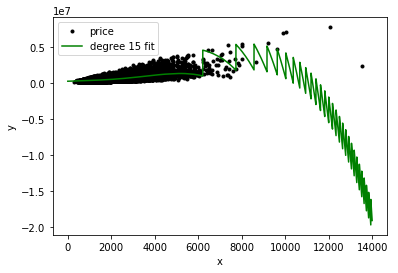

In [60]:
plot_poly_predictions(poly15_data,sales['price'],model)

In [17]:
poly15_data

,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15
19452,290.0,84100.0,2.438900e+07,7.072810e+09,2.051115e+12,5.948233e+14,1.724988e+17,5.002464e+19,1.450715e+22,4.207072e+24,1.220051e+27,3.538148e+29,1.026063e+32,2.975582e+34,8.629189e+36
15381,370.0,136900.0,5.065300e+07,1.874161e+10,6.934396e+12,2.565726e+15,9.493188e+17,3.512479e+20,1.299617e+23,4.808584e+25,1.779176e+28,6.582952e+30,2.435692e+33,9.012061e+35,3.334463e+38
860,380.0,144400.0,5.487200e+07,2.085136e+10,7.923517e+12,3.010936e+15,1.144156e+18,4.347792e+20,1.652161e+23,6.278212e+25,2.385721e+28,9.065738e+30,3.444980e+33,1.309093e+36,4.974552e+38
18379,384.0,147456.0,5.662310e+07,2.174327e+10,8.349416e+12,3.206176e+15,1.231172e+18,4.727699e+20,1.815436e+23,6.971275e+25,2.676970e+28,1.027956e+31,3.947353e+33,1.515783e+36,5.820608e+38
4868,390.0,152100.0,5.931900e+07,2.313441e+10,9.022420e+12,3.518744e+15,1.372310e+18,5.352009e+20,2.087284e+23,8.140406e+25,3.174758e+28,1.238156e+31,4.828807e+33,1.883235e+36,7.344616e+38
21332,390.0,152100.0,5.931900e+07,2.313441e+10,9.022420e+12,3.518744e+15,1.372310e+18,5.352009e+20,2.087284e+23,8.140406e+25,3.174758e+28,1.238156e+31,4.828807e+33,1.883235e+36,7.344616e+38
8623,410.0,168100.0,6.892100e+07,2.825761e+10,1.158562e+13,4.750104e+15,1.947543e+18,7.984925e+20,3.273819e+23,1.342266e+26,5.503290e+28,2.256349e+31,9.251031e+33,3.792923e+36,1.555098e+39
11500,420.0,176400.0,7.408800e+07,3.111696e+10,1.306912e+13,5.489032e+15,2.305393e+18,9.682652e+20,4.066714e+23,1.708020e+26,7.173683e+28,3.012947e+31,1.265438e+34,5.314838e+36,2.232232e+39
14466,420.0,176400.0,7.408800e+07,3.111696e+10,1.306912e+13,5.489032e+15,2.305393e+18,9.682652e+20,4.066714e+23,1.708020e+26,7.173683e+28,3.012947e+31,1.265438e+34,5.314838e+36,2.232232e+39
465,430.0,184900.0,7.950700e+07,3.418801e+10,1.470084e+13,6.321363e+15,2.718186e+18,1.168820e+21,5.025926e+23,2.161148e+26,9.292937e+28,3.995963e+31,1.718264e+34,7.388536e+36,3.177070e+39


In [15]:
model.coef_

array([ 1.24873306e+02, -4.77376011e-02,  3.01446238e-05, -2.44419942e-09,
       -1.94153675e-13,  8.54085686e-18,  1.51142121e-21,  8.27979094e-26,
        6.52603100e-31, -3.27895017e-34, -3.87962315e-38, -2.72437650e-42,
       -1.07790800e-46,  3.78242694e-51,  1.39790296e-54])

# 4 subsets

## small l2 penalty

In [18]:
# dtype_dict same as above
set_1 = pd.read_csv('wk3_kc_house_set_1_data.csv', dtype=dtype_dict)
set_2 = pd.read_csv('wk3_kc_house_set_2_data.csv', dtype=dtype_dict)
set_3 = pd.read_csv('wk3_kc_house_set_3_data.csv', dtype=dtype_dict)
set_4 = pd.read_csv('wk3_kc_house_set_4_data.csv', dtype=dtype_dict)

In [19]:
new_l2_small_penalty=1e-9

In [55]:
poly15_data_set1 = polynomial_dataframe(set_1['sqft_living'], 15) # use equivalent of `polynomial_sframe`
y1=set_1['price']
model1 = linear_model.Ridge(alpha=new_l2_small_penalty, normalize=True)
model1.fit(poly15_data_set1, y1)

Ridge(alpha=1e-09, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

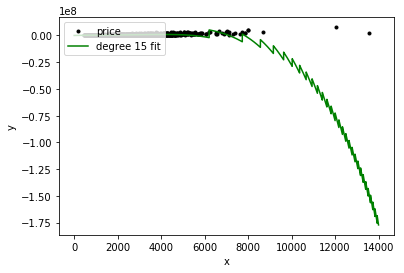

In [59]:
plot_poly_predictions(poly15_data_set1,y1,model1)

In [61]:
poly15_data_set2 = polynomial_dataframe(set_2['sqft_living'], 15) # use equivalent of `polynomial_sframe`
y2=set_2['price']
model2 = linear_model.Ridge(alpha=new_l2_small_penalty, normalize=True)
model2.fit(poly15_data_set2, y2)

Ridge(alpha=1e-09, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

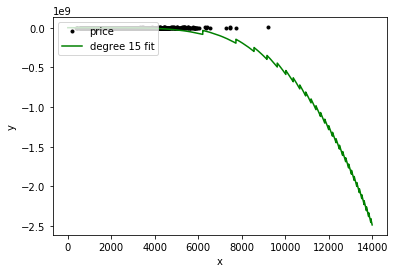

In [62]:
plot_poly_predictions(poly15_data_set2,y2,model2)

In [63]:
poly15_data_set3 = polynomial_dataframe(set_3['sqft_living'], 15) # use equivalent of `polynomial_sframe`
y3=set_3['price']
model3 = linear_model.Ridge(alpha=new_l2_small_penalty, normalize=True)
model3.fit(poly15_data_set3, y3)

Ridge(alpha=1e-09, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [69]:
poly15_data_set4 = polynomial_dataframe(set_4['sqft_living'], 15) # use equivalent of `polynomial_sframe`
y4=set_4['price']
model4 = linear_model.Ridge(alpha=new_l2_small_penalty, normalize=True)
model4.fit(poly15_data_set4, y4)

Ridge(alpha=1e-09, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [65]:
model1.coef_


array([ 1.11944571e+03, -9.83760212e-01,  3.38770897e-04,  3.60377210e-08,
       -4.37814017e-11,  5.77191690e-15,  7.66795221e-19, -9.49297664e-23,
       -1.96030821e-26, -2.10880284e-32,  3.31005065e-34,  3.47733891e-38,
       -2.43039323e-42, -8.79553219e-46,  6.44569659e-50])

In [66]:
model2.coef_


array([ 8.59362651e+02, -8.18118278e-01,  4.28879983e-04, -9.12770660e-08,
       -2.69604404e-12,  3.73980300e-15, -1.42711882e-19, -6.30794703e-23,
       -1.44559628e-27,  7.44321353e-31,  9.25865883e-35,  3.28010472e-41,
       -1.29543508e-42, -1.38781255e-46,  1.66546444e-50])

In [67]:
model3.coef_


array([-7.55395963e+02,  9.75579541e-01, -4.58946006e-04,  7.77958112e-08,
        7.15013417e-12, -2.88602002e-15, -2.13677720e-20,  3.38085194e-23,
        2.19178226e-27, -1.97067793e-31, -4.15993202e-35, -1.80196143e-39,
        3.19071198e-43,  5.08456859e-47, -3.93304243e-51])

In [70]:
model4.coef_

array([ 1.11944571e+03, -9.83760212e-01,  3.38770897e-04,  3.60377210e-08,
       -4.37814017e-11,  5.77191690e-15,  7.66795221e-19, -9.49297664e-23,
       -1.96030821e-26, -2.10880284e-32,  3.31005065e-34,  3.47733891e-38,
       -2.43039323e-42, -8.79553219e-46,  6.44569659e-50])

## large l2 penalty

In [72]:
l2_large_penalty=1.23e2

In [73]:
poly15_data_set1 = polynomial_dataframe(set_1['sqft_living'], 15) # use equivalent of `polynomial_sframe`
y1=set_1['price']
model1 = linear_model.Ridge(alpha=l2_large_penalty, normalize=True)
model1.fit(poly15_data_set1, y1)

Ridge(alpha=123.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

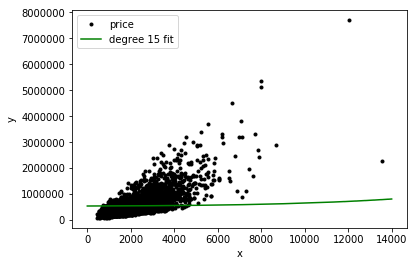

In [74]:
plot_poly_predictions(poly15_data_set1,y1,model1)

In [75]:
poly15_data_set2 = polynomial_dataframe(set_2['sqft_living'], 15) # use equivalent of `polynomial_sframe`
y2=set_2['price']
model2 = linear_model.Ridge(alpha=l2_large_penalty, normalize=True)
model2.fit(poly15_data_set2, y2)

Ridge(alpha=123.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

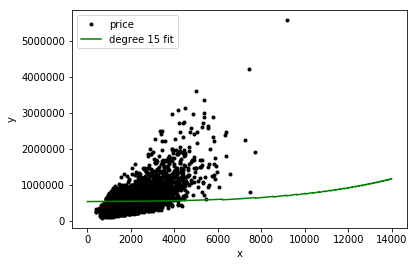

In [76]:
plot_poly_predictions(poly15_data_set2,y2,model2)

In [77]:
poly15_data_set3 = polynomial_dataframe(set_3['sqft_living'], 15) # use equivalent of `polynomial_sframe`
y3=set_3['price']
model3 = linear_model.Ridge(alpha=l2_large_penalty, normalize=True)
model3.fit(poly15_data_set3, y3)

Ridge(alpha=123.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [78]:
poly15_data_set4 = polynomial_dataframe(set_4['sqft_living'], 15) # use equivalent of `polynomial_sframe`
y4=set_4['price']
model4 = linear_model.Ridge(alpha=l2_large_penalty, normalize=True)
model4.fit(poly15_data_set4, y4)

Ridge(alpha=123.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [79]:
model1.coef_


array([2.32806803e+00, 3.53621608e-04, 3.31969692e-08, 2.00082477e-12,
       1.11492559e-16, 6.57786122e-21, 4.12939525e-25, 2.70393755e-29,
       1.81614763e-33, 1.23824277e-37, 8.51872481e-42, 5.89455598e-46,
       4.09542560e-50, 2.85464889e-54, 1.99547476e-58])

In [80]:
model2.coef_


array([2.09756903e+00, 3.90817483e-04, 6.67189944e-08, 8.90002997e-12,
       9.72639877e-16, 9.69733682e-20, 9.50564475e-24, 9.44491031e-28,
       9.57191338e-32, 9.86945155e-36, 1.03101115e-39, 1.08729784e-43,
       1.15453748e-47, 1.23211305e-51, 1.31986696e-55])

In [81]:
model3.coef_


array([2.28906258e+00, 4.12472190e-04, 6.08835345e-08, 6.58572163e-12,
       6.15278155e-16, 5.64446634e-20, 5.28834396e-24, 5.07091402e-28,
       4.94657273e-32, 4.88043809e-36, 4.85009106e-40, 4.84161534e-44,
       4.84635021e-48, 4.85883628e-52, 4.87558469e-56])

In [82]:
model4.coef_

array([2.08596194e+00, 4.05035772e-04, 7.46864647e-08, 1.13096608e-11,
       1.45864442e-15, 1.73561251e-19, 2.01609632e-23, 2.34605255e-27,
       2.75636073e-31, 3.27043069e-35, 3.91046855e-39, 4.70118041e-43,
       5.67212304e-47, 6.85958087e-51, 8.30843630e-55])

# Cross validation

In [111]:
train_valid_shuffled = pd.read_csv('wk3_kc_house_train_valid_shuffled.csv', dtype=dtype_dict)
test = pd.read_csv('wk3_kc_house_test_data.csv', dtype=dtype_dict)

In [103]:
def k_fold_cross_validation(k, l2_penalty, data, output):
    n = len(data)
    valid_error=0
    for i in range(k):
        start = int((n*i)/k)
        end = int((n*(i+1))/k-1)
        #print (i, (start, end))
        valid=data[start:end+1]
        valid_out=output[start:end+1]
        train=data[0:start].append(data[end+1:n])
        train_out=output[0:start].append(output[end+1:n])
        
        model = linear_model.Ridge(alpha=l2_penalty, normalize=True)
        model.fit(train,train_out)
        y=model.predict(valid)
        
        residual=y-valid_out
        RSS=np.dot(residual,residual)
        
        valid_error+=RSS
    return(valid_error/k)

In [89]:
train_valid_shuffled_poly15=polynomial_dataframe(train_valid_shuffled['sqft_living'], 15)

In [105]:
for l2 in np.logspace(3, 9, num=13):
    print(l2, k_fold_cross_validation(10,l2,train_valid_shuffled_poly15,train_valid_shuffled['price']))

1000.0 264977361036975.94
3162.2776601683795 265692935858318.3
10000.0 265924368957215.66
31622.776601683792 265998081509342.66
100000.0 266021444553980.5
316227.7660168379 266028837918724.5
1000000.0 266031176438467.84
3162277.6601683795 266031915996607.4
10000000.0 266032149870752.5
31622776.60168379 266032223828783.66
100000000.0 266032247216419.84
316227766.01683795 266032254612245.16
1000000000.0 266032256951011.0


In [106]:
np.logspace(3, 9, num=13)

array([1.00000000e+03, 3.16227766e+03, 1.00000000e+04, 3.16227766e+04,
       1.00000000e+05, 3.16227766e+05, 1.00000000e+06, 3.16227766e+06,
       1.00000000e+07, 3.16227766e+07, 1.00000000e+08, 3.16227766e+08,
       1.00000000e+09])

# Training final model with best l2

In [125]:
train_valid_shuffled = pd.read_csv('wk3_kc_house_train_valid_shuffled.csv', dtype=dtype_dict)
test = pd.read_csv('wk3_kc_house_test_data.csv', dtype=dtype_dict)

In [126]:
train_valid_shuffled_poly15=polynomial_dataframe(train_valid_shuffled['sqft_living'], 15)

In [127]:
output=train_valid_shuffled['price']

In [128]:
model = linear_model.Ridge(alpha=1000, normalize=True)
model.fit(train_valid_shuffled_poly15,output)

Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [130]:
test_poly15=polynomial_dataframe(test['sqft_living'], 15)
test_output=test['price']
y=model.predict(test_poly15)

In [131]:
residual=y-test_output
RSS=np.dot(residual,residual)

In [132]:
RSS

283856861224150.8

# Quiz answers


1: power_1 coefficient = 1.24873306e+02 

2: smallest and largest power_1 coef for the 4 models, small penalty = 
-7.55395963e+02, 1.11944571e+03 

3:  smallest and largest power_1 coef for the 4 models, large penalty = 2.08596194e+00, 2.32806803e+00 

4: 1000

5: 283856861224150.8